Data covers from 1970 to 2021, UNICEF, Kids under 5 with stunt/severe stunting, wasted/severe wasted, and overweight. 
https://data.unicef.org/resources/data_explorer/unicef_f/?ag=UNICEF&df=GLOBAL_DATAFLOW&ver=1.0&dq=.NT_ANT_HAZ_NE2+NT_ANT_HAZ_NE3..&startPeriod=2016&endPeriod=2021

download essential library

In [980]:
import numpy as np 
import pandas as pd 
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt # plot
from sklearn import linear_model # linear regression
import statsmodels.api as sm
from seaborn import heatmap

In [981]:
wasted_data = pd.read_csv("Wasted_Data.csv")
display(wasted_data[:3])

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE2: Weight-for-height <-2 SD (wast...,F: Female,2004,9.3,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE2: Weight-for-height <-2 SD (wast...,F: Female,2013,8.7,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,2080089.9,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan National Nutrition Survey 2013,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE2: Weight-for-height <-2 SD (wast...,F: Female,2018,4.1,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9593.1,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old


In [982]:
wasted_data['INDICATOR:Indicator'].unique() #for wasting only

array(['NT_ANT_WHZ_NE2: Weight-for-height <-2 SD (wasting)'], dtype=object)

In [983]:
ser_wasted_data=pd.read_csv("Severe_Wasted_Data.csv")
display(ser_wasted_data[:3])

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE3: Weight-for-height <-3 SD (seve...,F: Female,2004,4.3,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE3: Weight-for-height <-3 SD (seve...,F: Female,2013,3.5,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,2080089.9,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan National Nutrition Survey 2013,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_NE3: Weight-for-height <-3 SD (seve...,F: Female,2018,1.4,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9593.1,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old


In [984]:
ser_wasted_data['INDICATOR:Indicator'].unique() #for severe wasting only

array(['NT_ANT_WHZ_NE3: Weight-for-height <-3 SD (severe wasting)'],
      dtype=object)

In [985]:
#wasted_data['TIME_PERIOD:Time period'].unique() #1983 to 2020

In [986]:
stunted_data = pd.read_csv("Stunt_Data.csv")
display(stunted_data[:3])

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2004,58.5,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2013,39.5,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,2077662.4,Height/length modality (standing/lying) was no...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan National Nutrition Survey 2013,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting),F: Female,2018,38.1,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9303.1,Height/length modality (standing/lying) was no...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old


In [987]:
stunted_data['INDICATOR:Indicator'].unique() #stunting only

array(['NT_ANT_HAZ_NE2: Height-for-age <-2 SD (stunting)'], dtype=object)

In [988]:
#stunted_data['TIME_PERIOD:Time period'].unique() #1983 to 2021

In [989]:
ser_stunted_data = pd.read_csv("Severe_Stunt_Data.csv")
display(ser_stunted_data[:3])

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe ...,F: Female,2004,30.9,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe ...,F: Female,2013,19.9,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,2077662.4,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan National Nutrition Survey 2013,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe ...,F: Female,2018,20.0,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9303.1,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,2004-2018,Y0T4: Under 5 years old


In [990]:
ser_stunted_data['INDICATOR:Indicator'].unique() #severe stunting only

array(['NT_ANT_HAZ_NE3: Height-for-age <-3 SD (Severe Stunting)'],
      dtype=object)

In [991]:
overweight_data = pd.read_csv("Overweight_Data.csv")
display(overweight_data[:3])

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_PO2: Weight-for-height >+2 SD (over...,F: Female,2004,2.6,0: Units,PCNT: %,ER: External Reanalysis,F: Free,...,436.0,Reduced age range Age 0-5 months not covered ...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Summary report of the national nutrition surve...,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_PO2: Weight-for-height >+2 SD (over...,F: Female,2013,5.8,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,2080089.9,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan National Nutrition Survey 2013,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,NT_ANT_WHZ_PO2: Weight-for-height >+2 SD (over...,F: Female,2018,4.2,0: Units,PCNT: %,RA: Reanalysed,F: Free,...,9593.1,Oedema data was not considered in the analysis...,UNICEF/WHO/World Bank Joint Malnutrition Estim...,Afghanistan Health Survey 2018,https://data.unicef.org/topic/nutrition/malnut...,UNICEF Division of Data Analysis Planning an...,MOF: Middle of fieldwork,NaN,1997-2018,Y0T4: Under 5 years old


In [992]:
overweight_data['INDICATOR:Indicator'].unique() #overweight only


array(['NT_ANT_WHZ_PO2: Weight-for-height >+2 SD (overweight)'],
      dtype=object)

In [993]:
#overweight_data['TIME_PERIOD:Time period'].unique() #1983 to 2021

In [994]:
# data cleaning
# rename columns
# wasted
wasted_data = wasted_data.rename(columns = {"REF_AREA:Geographic area" : "Country", "SEX:Sex" : "Sex",\
                                           "TIME_PERIOD:Time period" : "Year", "OBS_VALUE:Observation Value" : "Waste_percent",\
                                           'AGE:Current age':'Age'})
# severe_wasted
ser_wasted_data=ser_wasted_data.rename(columns = {"REF_AREA:Geographic area" : "Country", "SEX:Sex" : "Sex",\
                                           "TIME_PERIOD:Time period" : "Year", "OBS_VALUE:Observation Value" : "Severe_Waste_percent",\
                                           'AGE:Current age':'Age'})
# stunted
stunted_data = stunted_data.rename(columns = {"REF_AREA:Geographic area" : "Country", "SEX:Sex" : "Sex",\
                                          "TIME_PERIOD:Time period" : "Year", "OBS_VALUE:Observation Value" : "Stunt_percent",\
                                            'AGE:Current age':'Age'})
# severe stunted
ser_stunted_data = ser_stunted_data.rename(columns = {"REF_AREA:Geographic area" : "Country", "SEX:Sex" : "Sex",\
                                          "TIME_PERIOD:Time period" : "Year", "OBS_VALUE:Observation Value" : "Severe_Stunt_percent",\
                                           'AGE:Current age':'Age'})
# overweight
overweight_data = overweight_data.rename(columns = {"REF_AREA:Geographic area" : "Country", "SEX:Sex" : "Sex",\
                                           "TIME_PERIOD:Time period" : "Year", "OBS_VALUE:Observation Value" : "Overweight_percent",\
                                            "INDICATOR:Indicator":"Overweight_Indicator",'AGE:Current age':'Age'})

In [995]:
# reduce non-important data columns
#wasted_data.head(3)
wasted_df=wasted_data[['Country','Sex','Year','Waste_percent','Age']]
wasted_df.head(1)

,Country,Sex,Year,Waste_percent,Age
0,AFG: Afghanistan,F: Female,2004,9.3,Y0T4: Under 5 years old


In [996]:
ser_wasted_df=ser_wasted_data[['Country','Sex','Year','Severe_Waste_percent','Age']]
ser_wasted_df.head(1)

,Country,Sex,Year,Severe_Waste_percent,Age
0,AFG: Afghanistan,F: Female,2004,4.3,Y0T4: Under 5 years old


In [997]:
stunted_df=stunted_data[['Country','Sex','Year','Stunt_percent','Age']]
stunted_df.head(1)

,Country,Sex,Year,Stunt_percent,Age
0,AFG: Afghanistan,F: Female,2004,58.5,Y0T4: Under 5 years old


In [998]:
ser_stunted_df=ser_stunted_data[['Country','Sex','Year','Severe_Stunt_percent','Age']]
ser_wasted_df.head(1)

,Country,Sex,Year,Severe_Waste_percent,Age
0,AFG: Afghanistan,F: Female,2004,4.3,Y0T4: Under 5 years old


In [999]:
overweight_df=overweight_data[['Country','Sex','Year','Overweight_percent','Age']]
overweight_df.head(1)

,Country,Sex,Year,Overweight_percent,Age
0,AFG: Afghanistan,F: Female,2004,2.6,Y0T4: Under 5 years old


In [1000]:
# combine with outer-join > there might be "NA"
combined_df=wasted_df.merge(ser_wasted_df,how='outer',on=['Country','Sex','Year','Age'])\
            .merge(stunted_df,how='outer',on=['Country','Sex','Year','Age'])\
            .merge(ser_stunted_df,how='outer',on=['Country','Sex','Year','Age'])\
            .merge(overweight_df,how='outer',on=['Country','Sex','Year','Age'])\
            
combined_df.head(5)

,Country,Sex,Year,Waste_percent,Age,Severe_Waste_percent,Stunt_percent,Severe_Stunt_percent,Overweight_percent
0,AFG: Afghanistan,F: Female,2004,9.3,Y0T4: Under 5 years old,4.3,58.5,30.9,2.6
1,AFG: Afghanistan,F: Female,2013,8.7,Y0T4: Under 5 years old,3.5,39.5,19.9,5.8
2,AFG: Afghanistan,F: Female,2018,4.1,Y0T4: Under 5 years old,1.4,38.1,20.0,4.2
3,AFG: Afghanistan,M: Male,2004,7.9,Y0T4: Under 5 years old,2.9,60.0,32.6,6.3
4,AFG: Afghanistan,M: Male,2013,10.3,Y0T4: Under 5 years old,4.5,41.3,21.0,4.9


In [1001]:
# Observe properties of some columns
# 1. Is age all under 5?
combined_df['Age'].unique()
print('All data are for kids under 5 years old.')

All data are for kids under 5 years old.


In [1002]:
del combined_df['Age']

In [1003]:
# 2. Number of countries
country_count=len(combined_df['Country'].unique())
print('There are a total number of '+ str(country_count) + ' countries/regions in the DataFrame.')

There are a total number of 239 countries/regions in the DataFrame.


In [1004]:
# Format countries, separate to 3 digit ISO code and name
split_countries= combined_df["Country"].str.split(':', expand=True)
#print(type(split_countries))
# join to combine df
combined_df = split_countries.join(combined_df)
# rename columns
combined_df = combined_df.rename(columns = {0 : "ISO Code", 1 : "Country Name"})
# format the region
combined_df["Country Name"] = combined_df["Country Name"].str.strip()
# filter only the countrys not regions

combined_df = combined_df[combined_df["ISO Code"].str.contains("_")==False]

# remove previous columns
del combined_df['Country']

combined_df.head(3)

,ISO Code,Country Name,Sex,Year,Waste_percent,Severe_Waste_percent,Stunt_percent,Severe_Stunt_percent,Overweight_percent
0,AFG,Afghanistan,F: Female,2004,9.3,4.3,58.5,30.9,2.6
1,AFG,Afghanistan,F: Female,2013,8.7,3.5,39.5,19.9,5.8
2,AFG,Afghanistan,F: Female,2018,4.1,1.4,38.1,20.0,4.2


In [1005]:
# 3. Years
combined_df['Year'].unique()

array(['2004', '2013', '2018', '1997', '2000', '2005', '2009', '2017',
       '1992', '1995', '2002', '2006', '2012', '2019', '1987', '1996',
       '2007', '2015', '1994', '1998', '2010', '2016', '2011', '2001',
       '1989', '2013-02-16', '2013-06-16', '2014', '1986', '1990', '1991',
       '1993', '1999', '2003', '2008', '1985', '2019-03-14', '2019-11-07',
       '2019-08-12', '2019-08-27', '1988', '1998-01-01', '1998-12-01',
       '2018-03-13', '2018-04-09', '2020', '2012-01-06', '2012-08-06',
       '2019-01-15', '2019-09-15', '1994-01-15', '1994-12-17',
       '2016-01-15', '2016-05-11', '2016-12-01', '2015-05-22',
       '2015-09-05', '2018-07-24', '2018-09-27', '2010-08-22',
       '2010-10-24', '2016-05-15', '2016-10-01', '2006-03-28',
       '2006-11-01', '2010-06-05', '2010-10-29', '2012-04-11',
       '2012-07-16', '2018-04-02', '2018-10-23', '1983', '2015-01-09',
       '2015-04-26', '2019-02-09', '2019-08-16', '2017-07-01',
       '2017-09-19', '2010-10-04', '2010-12-21

In [1006]:
# format the year columns
# year remove some date, only keep year
combined_df["Year"] =  pd.to_datetime(combined_df["Year"]).dt.year
# observe new column values
years=combined_df['Year'].unique()
print(sorted(years))

[1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [1007]:
# format sex, only filter the "Total in sex column"
combined_df["Sex"] = combined_df["Sex"].str[1]
combined_df=combined_df[combined_df["Sex"]=='T']


In [1008]:
# sort df in year
combined_df=combined_df.sort_values(by='Year',ascending=False)
combined_df.dropna(inplace=True) #drop NaN

print('There is a total of '+ str(len(combined_df)) +' countries in the dataset.')
display(combined_df[:5])

There is a total of 709 countries in the dataset.


,ISO Code,Country Name,Sex,Year,Waste_percent,Severe_Waste_percent,Stunt_percent,Severe_Stunt_percent,Overweight_percent
1623,NGA,Nigeria,T,2020,6.5,1.4,31.5,12.0,1.6
732,GMB,Gambia,T,2020,5.1,0.6,17.5,3.5,2.1
2027,PSE,State of Palestine,T,2020,1.3,0.6,8.7,2.4,8.6
1835,RWA,Rwanda,T,2020,1.1,0.2,33.1,9.2,5.6
1937,SLE,Sierra Leone,T,2019,5.4,1.1,29.5,10.7,4.5


In [1009]:
# create a new column of malnutrition score for mean of the five malnutrition factor
combined_df['Mean']=combined_df.iloc[:,4:9].mean(axis=1)
combined_df.head(5)

,ISO Code,Country Name,Sex,Year,Waste_percent,Severe_Waste_percent,Stunt_percent,Severe_Stunt_percent,Overweight_percent,Mean
1623,NGA,Nigeria,T,2020,6.5,1.4,31.5,12.0,1.6,10.60
732,GMB,Gambia,T,2020,5.1,0.6,17.5,3.5,2.1,5.76
2027,PSE,State of Palestine,T,2020,1.3,0.6,8.7,2.4,8.6,4.32
1835,RWA,Rwanda,T,2020,1.1,0.2,33.1,9.2,5.6,9.84
1937,SLE,Sierra Leone,T,2019,5.4,1.1,29.5,10.7,4.5,10.24


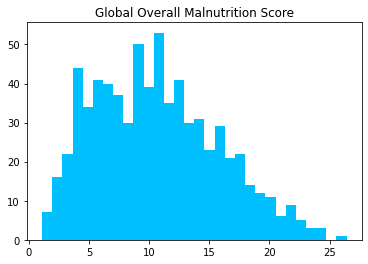

In [1010]:
# Observe the data
plt.hist(combined_df['Mean'],bins=30,color='deepskyblue')
plt.title('Global Overall Malnutrition Score')
plt.show()

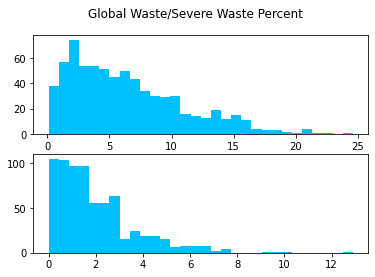

In [1011]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Global Waste/Severe Waste Percent')
ax1.hist(combined_df['Waste_percent'],bins=30,color='deepskyblue')
ax2.hist(combined_df['Severe_Waste_percent'],bins=30,color='deepskyblue')
plt.show()

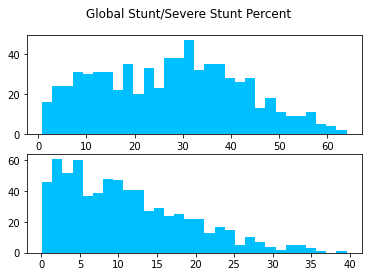

In [1012]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Global Stunt/Severe Stunt Percent')
ax1.hist(combined_df['Stunt_percent'],bins=30,color='deepskyblue')
ax2.hist(combined_df['Severe_Stunt_percent'],bins=30,color='deepskyblue')
plt.show()

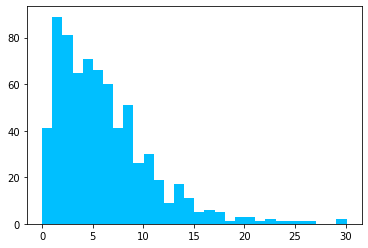

In [1013]:
plt.hist(combined_df['Overweight_percent'],bins=30,color='deepskyblue')
plt.show()

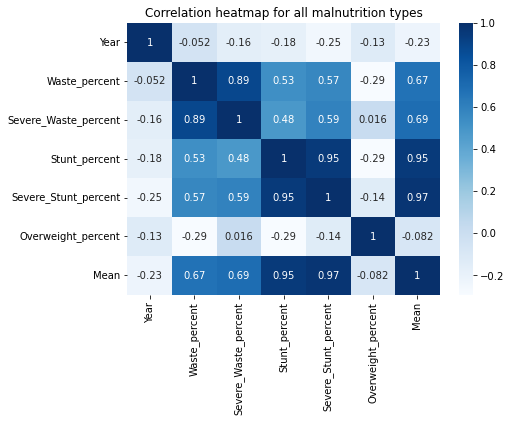

In [1014]:
# observe correlation map
corr = combined_df.corr() # train is a pandas dataframe 
plt.figure(figsize = (7, 5))
heatmap(corr, cmap = 'Blues',annot=True)
plt.title('Correlation heatmap for all malnutrition types')
plt.show()

In [1015]:
# Observed that overweight has negative correlation/impact to all other factors
# so only leave only 4 other malnutrition factors cause mostly caused by hunger
stunt_waste_df=combined_df.copy()
del_cols=['Year','Sex','Overweight_percent','Mean']
for c in del_cols:
    stunt_waste_df.pop(c)

stunt_waste_df['S&W_Mean']=combined_df.iloc[:,4:8].mean(axis=1)
stunt_waste_df.head(5)


,ISO Code,Country Name,Waste_percent,Severe_Waste_percent,Stunt_percent,Severe_Stunt_percent,S&W_Mean
1623,NGA,Nigeria,6.5,1.4,31.5,12.0,12.850
732,GMB,Gambia,5.1,0.6,17.5,3.5,6.675
2027,PSE,State of Palestine,1.3,0.6,8.7,2.4,3.250
1835,RWA,Rwanda,1.1,0.2,33.1,9.2,10.900
1937,SLE,Sierra Leone,5.4,1.1,29.5,10.7,11.675


<AxesSubplot:>

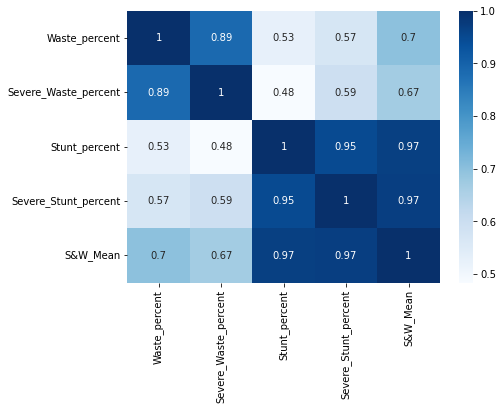

In [1016]:
sw_corr = stunt_waste_df.corr() # train is a pandas dataframe 
plt.figure(figsize = (7, 5))
heatmap(sw_corr, cmap = 'Blues',annot=True)

In [1017]:
# Observe US first
country_df=combined_df.copy()
country_df.index = country_df["ISO Code"] #make the iso code as index 
combined_df.loc['USA'].plot(x='Year', y=['Waste_percent','Severe_Waste_percent','Stunt_percent','Severe_Stunt_percent','Overweight_percent'])
plt.title('US malnutrition data')
plt.show()


KeyError: 'USA'

In [1018]:
# Now all variables are positively correlated
# groupby countries, find the country with highest mean malnutrition value
sw_by_country_df=stunt_waste_df.groupby(by=['Country Name'],as_index=False).mean()
sw_by_country_df.sort_values(by='S&W_Mean',ascending=True,inplace=True)

# keep a record of the top 5 and bot 5 country with S&W mean for observation
top5=sw_by_country_df[:5]['Country Name'].tolist()
#top5=sw_by_country_df[:5]['ISO Code'].tolist()
display(top5) # the five country with least percentages of Stunt & Waste mean


['Poland', 'Greece', 'Belgium', 'Germany', 'Netherlands']

In [1019]:
display(sw_by_country_df[:5])

,Country Name,Waste_percent,Severe_Waste_percent,Stunt_percent,Severe_Stunt_percent,S&W_Mean
103,Poland,0.7,0.00,0.8,0.10,0.400
52,Greece,0.6,0.00,1.5,0.30,0.600
10,Belgium,0.4,0.00,1.6,0.40,0.600
50,Germany,1.0,0.10,1.3,0.20,0.650
91,Netherlands,1.1,0.15,1.4,0.25,0.725


In [1020]:
bot5=sw_by_country_df[-5:]['Country Name'].tolist()
display(bot5) # the five country with high percentages of Stunt & Waste mean


['South Sudan', 'Eritrea', 'Burundi', 'Yemen', 'Timor-Leste']

,ISO Code,Country Name,Sex,Year,Waste_percent,Severe_Waste_percent,Stunt_percent,Severe_Stunt_percent,Overweight_percent,Mean
152,BEL,Belgium,T,2014,0.4,0.0,1.6,0.4,3.9,1.26
1779,POL,Poland,T,2011,0.7,0.0,0.8,0.1,5.0,1.32
1521,NLD,Netherlands,T,2009,1.0,0.1,1.5,0.3,3.8,1.34
746,DEU,Germany,T,2004,1.0,0.1,1.3,0.2,3.5,1.22
776,GRC,Greece,T,2003,0.6,0.0,1.5,0.3,13.6,3.20
1520,NLD,Netherlands,T,1996,1.2,0.2,1.3,0.2,2.7,1.12


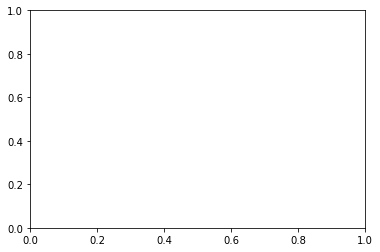

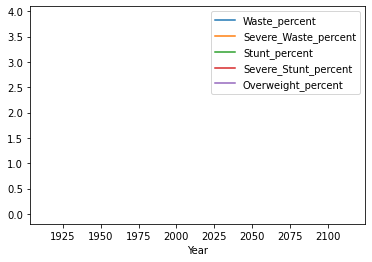

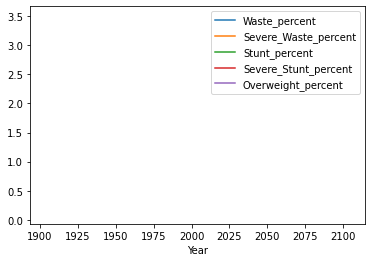

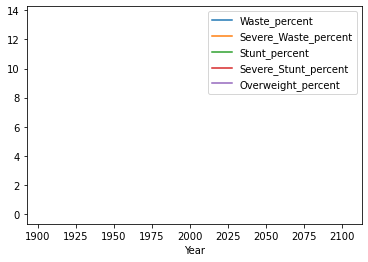

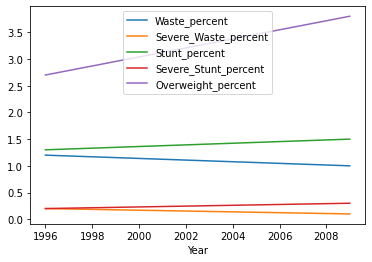

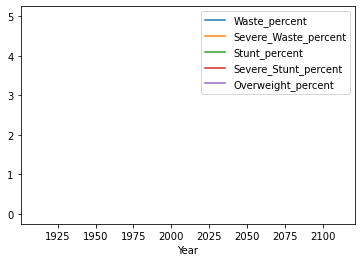

In [1021]:
###### 
# Plot graphs to observe the trend for each malnutrition type at country level for top 5 countries
top5_df = combined_df[combined_df['Country Name'].isin(top5)]
display(top5_df)
fig, ax = plt.subplots()
top5_df.groupby('Country Name').plot(x='Year', y=['Waste_percent','Severe_Waste_percent','Stunt_percent','Severe_Stunt_percent','Overweight_percent'])
plt.show()


In [1022]:
#combined_df.loc['POL'].plot(x='Year', y=['Waste_percent','Severe_Waste_percent','Stunt_percent','Severe_Stunt_percent','Overweight_percent'])


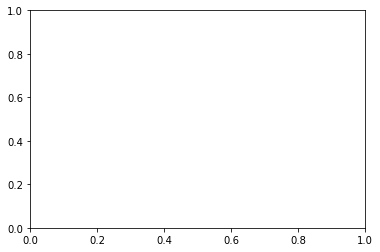

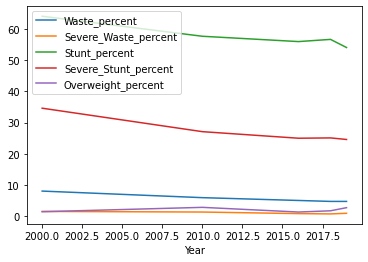

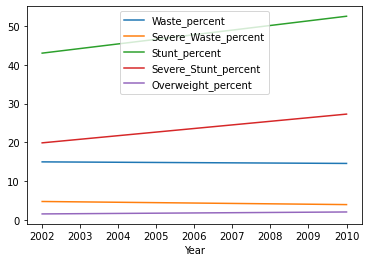

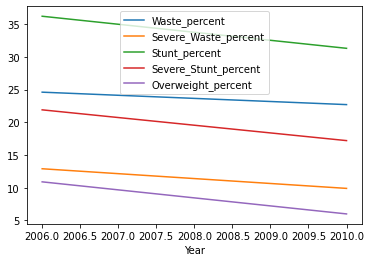

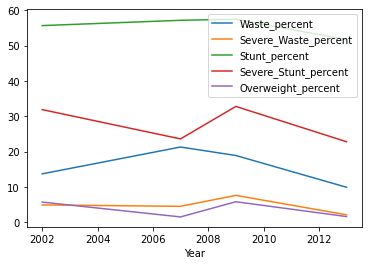

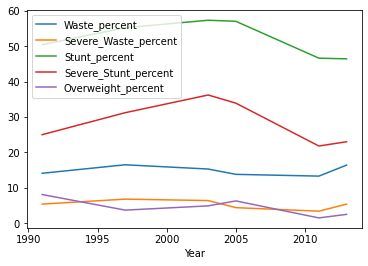

In [1023]:
bot5_df = combined_df[combined_df['Country Name'].isin(bot5)]
fig, ax = plt.subplots()
bot5_df.groupby('Country Name').plot(x='Year', y=['Waste_percent','Severe_Waste_percent','Stunt_percent','Severe_Stunt_percent','Overweight_percent'])
plt.show()


In [1024]:
# observe countries and their means using seaborn
#sns.lineplot(x="Year", y="Mean", data=top5_df).set(title = "top5 countries with highest sw mean")


In [1025]:
###### 
# Download covid vaccine rate data to covid_data from https://ourworldindata.org/covid-vaccinations
covid_data=pd.read_csv("owid-covid-data.csv")
covid_data.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
151543,ZWE,Africa,Zimbabwe,2021-12-28,207548.0,2099.0,1397.143,4940.0,32.0,17.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
151544,ZWE,Africa,Zimbabwe,2021-12-29,207548.0,0.0,1163.429,4940.0,0.0,16.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
151545,ZWE,Africa,Zimbabwe,2021-12-30,211728.0,4180.0,1483.429,4997.0,57.0,20.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
151546,ZWE,Africa,Zimbabwe,2021-12-31,213258.0,1530.0,1503.143,5004.0,7.0,19.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
151547,ZWE,Africa,Zimbabwe,2022-01-01,214214.0,956.0,1495.429,5017.0,13.0,18.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [1026]:
#before 12/31/2020, the total number of cases for each countries
covid_data=covid_data[covid_data['date']<'2021-01-01']
covid_2020=covid_data.groupby(by='iso_code').max()
display(covid_2020)


/var/folders/qp/gg4gsq8d0ss5h1nfck_8gdq40000gn/T/ipykernel_60390/357881326.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  covid_2020=covid_data.groupby(by='iso_code').max()


,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
ABW,North America,Aruba,2020-12-31,5489.0,176.0,90.143,49.0,3.0,1.000,51205.747,...,NaN,NaN,NaN,NaN,76.29,NaN,66.2,14.96,59.84,617.566118
AFG,Asia,Afghanistan,2020-12-31,52330.0,1241.0,758.571,2189.0,49.0,26.429,1313.655,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
AGO,Africa,Angola,2020-12-31,17553.0,355.0,261.857,405.0,12.0,4.571,517.275,...,NaN,NaN,26.664,NaN,61.15,0.581,NaN,NaN,NaN,NaN
AIA,North America,Anguilla,2020-12-31,13.0,3.0,0.571,NaN,NaN,NaN,859.504,...,NaN,NaN,NaN,NaN,81.88,NaN,NaN,NaN,NaN,NaN
ALB,Europe,Albania,2020-12-31,58316.0,879.0,799.143,1181.0,19.0,16.286,20298.413,...,7.1,51.2,NaN,2.89,78.57,0.795,5812.4,26.67,120.15,2023.158207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,Oceania,Samoa,2020-12-31,2.0,1.0,0.143,NaN,NaN,NaN,9.993,...,16.7,38.1,NaN,NaN,73.32,0.715,NaN,NaN,NaN,NaN
YEM,Asia,Yemen,2020-12-31,2099.0,116.0,51.571,610.0,52.0,16.429,68.841,...,7.6,29.2,49.542,0.70,66.12,0.470,NaN,NaN,NaN,NaN
ZAF,Africa,South Africa,2020-12-31,1057161.0,18000.0,12656.857,28469.0,572.0,355.143,17607.026,...,8.1,33.2,43.993,2.32,64.13,0.709,49773.8,9.54,71.97,828.983100


In [1027]:
covid_2020=covid_2020.sort_values(by='total_cases')
# since cases number varies alot, apply z-score standardlization to total_cases column to normalize the case number
norm_covid_2020=covid_2020.copy()
norm_covid_2020['norm_total_cases'] = (norm_covid_2020['total_cases'] - norm_covid_2020['total_cases'].mean())\
                                    / (norm_covid_2020['total_cases'].std())    

display(norm_covid_2020)



,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,norm_total_cases
iso_code,,,,,,,,,,,,,,,,,,,,,
VUT,Oceania,Vanuatu,2020-12-31,1.0,1.0,0.143,NaN,NaN,NaN,3.180,...,34.500,25.209,NaN,70.47,0.609,NaN,NaN,NaN,NaN,-0.216846
WSM,Oceania,Samoa,2020-12-31,2.0,1.0,0.143,NaN,NaN,NaN,9.993,...,38.100,NaN,NaN,73.32,0.715,NaN,NaN,NaN,NaN,-0.216846
WLF,Oceania,Wallis and Futuna,2020-12-31,4.0,1.0,0.143,NaN,NaN,NaN,360.555,...,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN,-0.216846
MHL,Oceania,Marshall Islands,2020-12-31,4.0,3.0,0.429,NaN,NaN,NaN,67.094,...,NaN,82.502,2.700,73.70,0.704,NaN,NaN,NaN,NaN,-0.216846
SHN,Africa,Saint Helena,2020-12-31,4.0,2.0,0.286,NaN,NaN,NaN,656.276,...,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN,-0.216846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OWID_NAM,NaN,North America,2020-12-31,23150275.0,286075.0,245712.143,512711.0,5212.0,3668.429,38804.897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.976719
OWID_EUR,NaN,Europe,2020-12-31,23859991.0,345394.0,293718.143,545520.0,6443.0,5002.714,31857.370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.074624
OWID_UMC,NaN,Upper middle income,2020-12-31,25097583.0,212105.0,182072.714,714172.0,5584.0,3686.714,9984.427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.245349


,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,norm_total_cases
iso_code,,,,,,,,,,,,,,,,,,,,,
VUT,Oceania,Vanuatu,2020-12-31,1.0,1.0,0.143,NaN,NaN,NaN,3.180,...,34.5,25.209,NaN,70.47,0.609,NaN,NaN,NaN,NaN,-0.216846
WSM,Oceania,Samoa,2020-12-31,2.0,1.0,0.143,NaN,NaN,NaN,9.993,...,38.1,NaN,NaN,73.32,0.715,NaN,NaN,NaN,NaN,-0.216846
WLF,Oceania,Wallis and Futuna,2020-12-31,4.0,1.0,0.143,NaN,NaN,NaN,360.555,...,NaN,NaN,NaN,79.94,NaN,NaN,NaN,NaN,NaN,-0.216846
MHL,Oceania,Marshall Islands,2020-12-31,4.0,3.0,0.429,NaN,NaN,NaN,67.094,...,NaN,82.502,2.7,73.70,0.704,NaN,NaN,NaN,NaN,-0.216846
SHN,Africa,Saint Helena,2020-12-31,4.0,2.0,0.286,NaN,NaN,NaN,656.276,...,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN,-0.216846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OWID_ASI,NaN,Asia,2020-12-31,20716183.0,146135.0,129001.000,337854.0,2524.0,1848.714,4428.006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.640938
OWID_NAM,NaN,North America,2020-12-31,23150275.0,286075.0,245712.143,512711.0,5212.0,3668.429,38804.897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.976719
OWID_EUR,NaN,Europe,2020-12-31,23859991.0,345394.0,293718.143,545520.0,6443.0,5002.714,31857.370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.074624


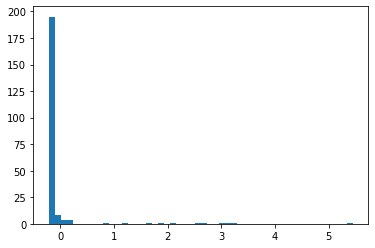

In [1028]:
norm_covid_2020=norm_covid_2020[:-1]
display(norm_covid_2020)
plt.hist(norm_covid_2020['norm_total_cases'],bins=50)
plt.show()

In [ ]:
# combine the new df with covid vaccine rate df
